<div style="background-color: #FAF9F6; font-family: 'Times New Roman', serif; font-size: 150%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <h1>
        <b>Hand Written Digits Project</b>
    </h1>
</div>


Data reference link : https://datahub.io/machine-learning/pendigits#readme

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">EDA & Visualizations</h3>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df0 = pd.read_csv("pendigits.csv")
df = df0.copy()
df.head(10)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
5,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6
6,0,100,3,72,26,35,85,35,100,71,73,97,65,49,66,0,4
7,0,39,2,62,11,5,63,0,100,43,89,99,36,100,0,57,0
8,13,89,12,50,72,38,56,0,4,17,0,61,32,94,100,100,5
9,57,100,22,72,0,31,25,0,75,13,100,50,75,87,26,85,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.000,38.814,34.258,0.000,6.000,32.000,65.000,100.000
input2,10992.000,85.120,16.219,0.000,76.000,89.000,100.000,100.000
input3,10992.000,40.606,26.343,0.000,20.000,40.000,58.000,100.000
input4,10992.000,83.774,19.164,0.000,72.000,91.000,100.000,100.000
input5,10992.000,49.770,34.101,0.000,18.000,53.000,78.000,100.000
input6,10992.000,65.573,26.997,0.000,49.000,71.000,86.000,100.000
input7,10992.000,51.220,30.577,0.000,28.000,53.500,74.000,100.000
input8,10992.000,44.499,29.906,0.000,23.000,43.000,64.000,100.000
input9,10992.000,56.869,34.136,0.000,29.000,60.000,89.000,100.000
input10,10992.000,33.696,27.252,0.000,7.000,33.000,54.000,100.000


In [5]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

,count,percentage
input1,0,0.000
input2,0,0.000
input3,0,0.000
input4,0,0.000
input5,0,0.000
input6,0,0.000
input7,0,0.000
input8,0,0.000
input9,0,0.000
input10,0,0.000


In [6]:
df["class"].value_counts()

class
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

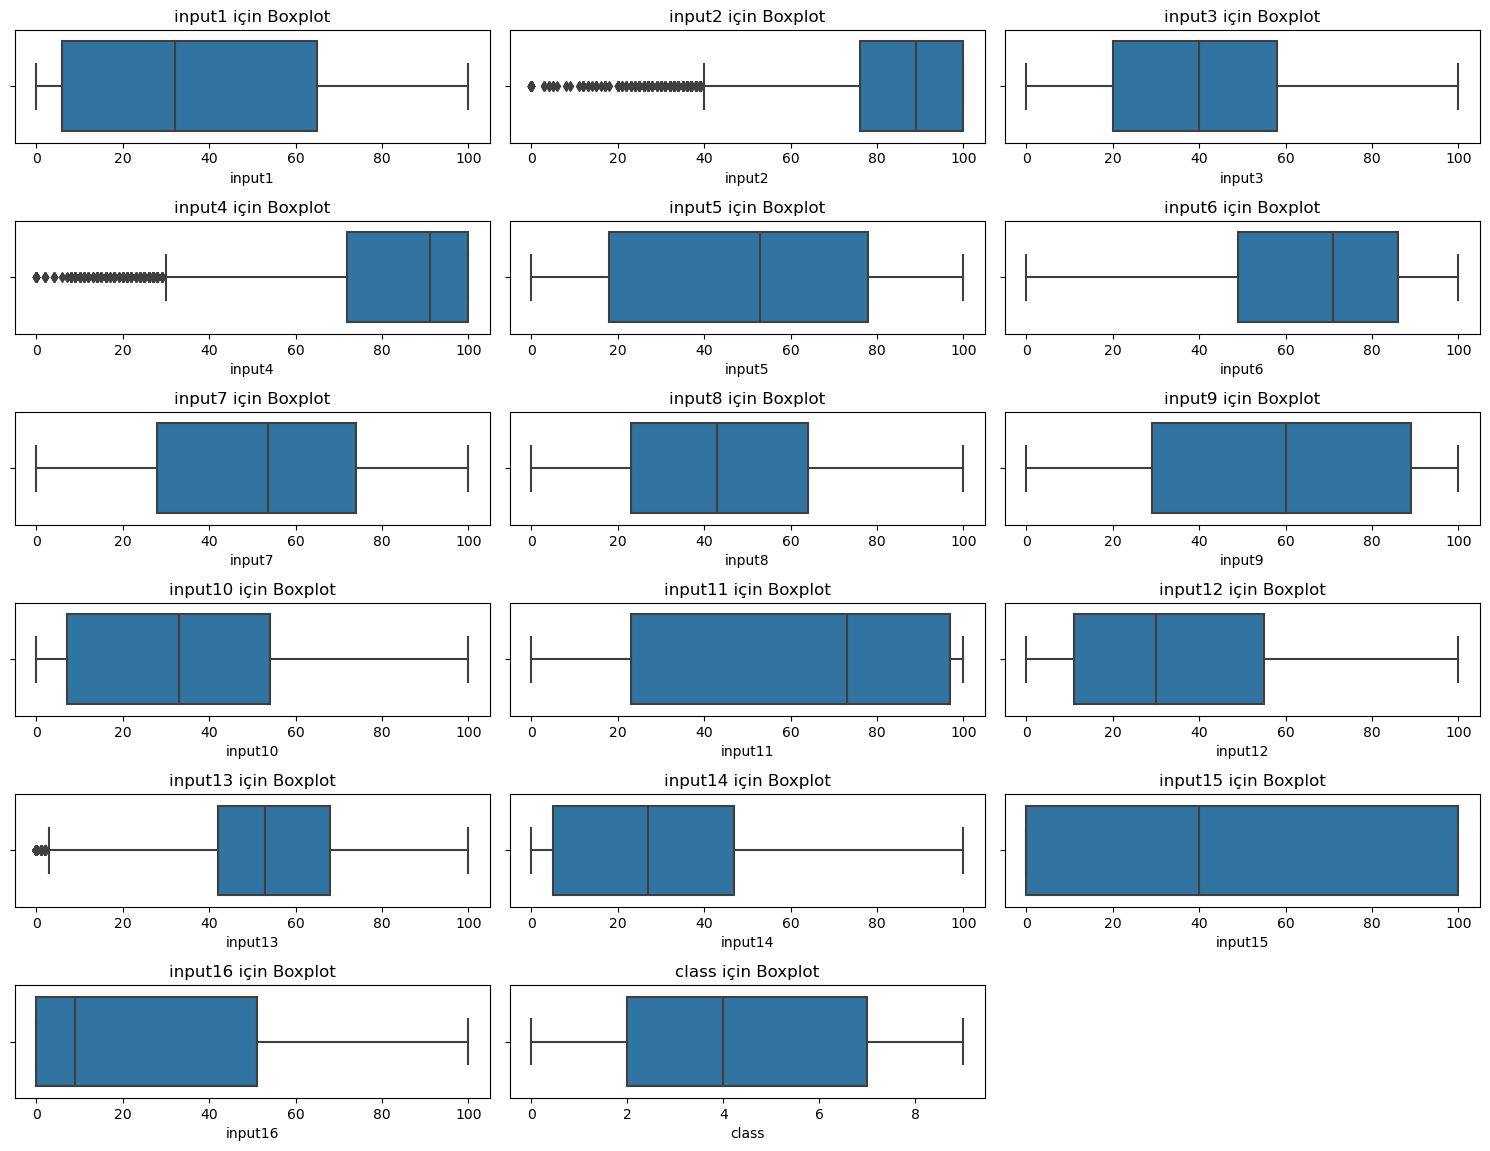

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

num_plots = len(numeric_df)

fig, axes = plt.subplots(8, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_df):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col} için Boxplot")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

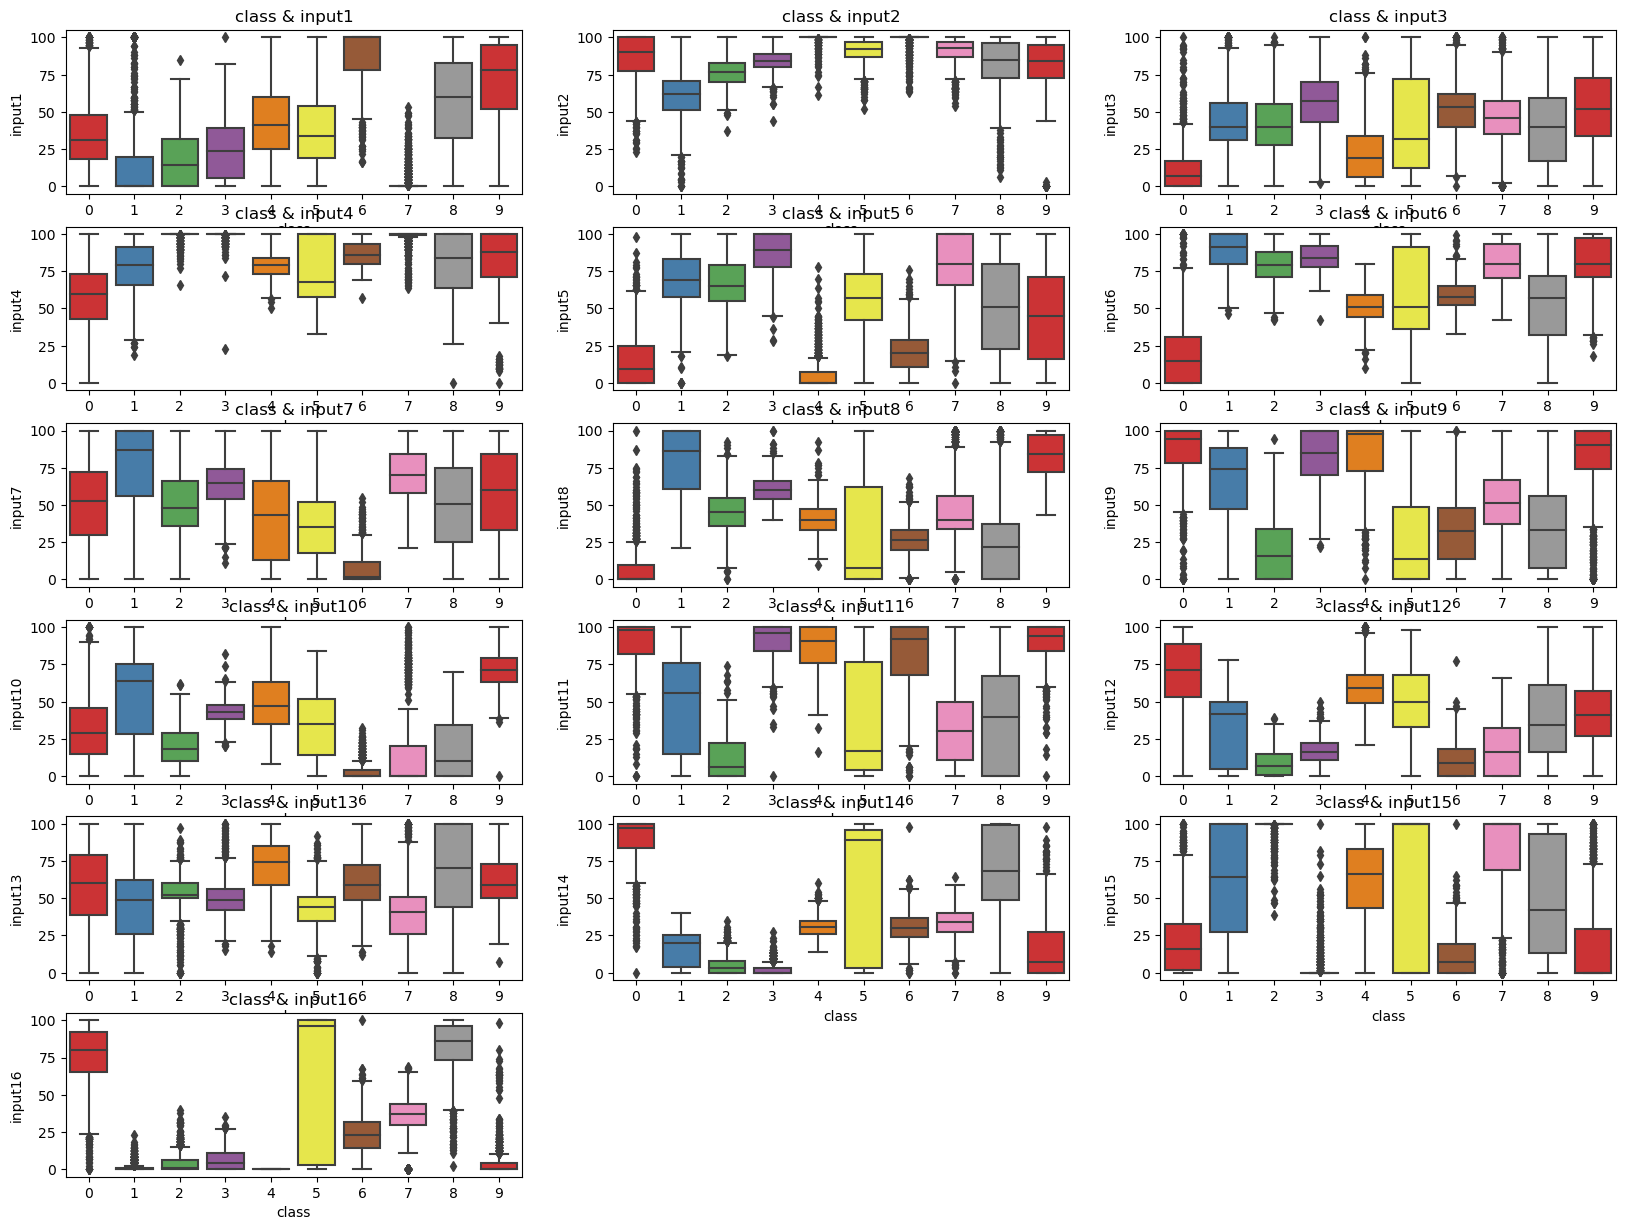

In [8]:
index = 0
plt.figure(figsize=(20,20))
for column in df.columns:
    if column != "class":
        index += 1
        plt.subplot(8,3,index)
        sns.boxplot(x='class',y=column, data=df, palette='Set1')
        plt.title(f'class & {column}')
plt.show()

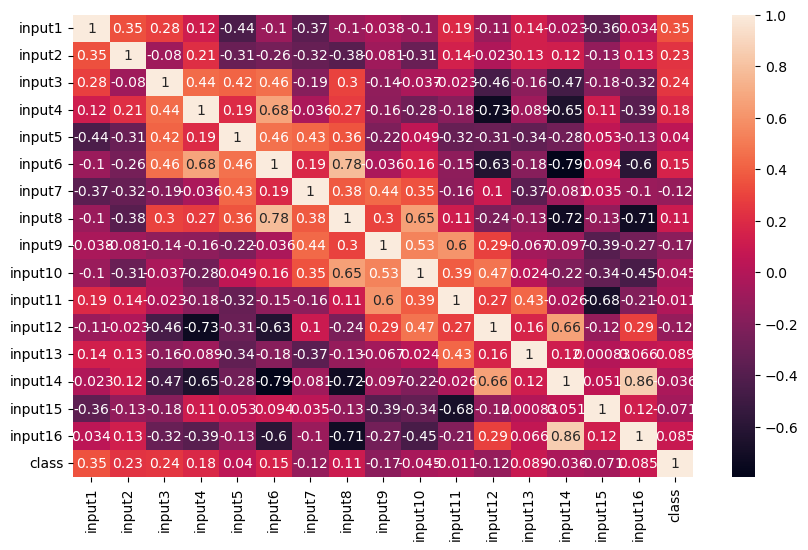

In [9]:
sns.heatmap(df.corr(), annot=True);

In [10]:
multiCorr = df.select_dtypes("number").corr()

multiCorr.style.set_properties(
    color="#00cc00", **{
        "background-color": "#00ff00"
    }
).applymap(
    lambda v:
    "font-size:25px; color:green; selector:td:hover, props:[(color, yellow)}"
    if v > .89 and v < 1 else "background-color:#370073").set_table_styles([{
        "selector":
        "td:hover",
        "props": [("color", "#9c337f"), ("font-size", "23px"),
                  ("font-weight", "bold")]
    }, {
        "selector":
        "th:hover",
        "props": [("color", "#9c337f"), ("font-weight", "bold")]
    }])

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
input1,1.000000,0.347763,0.280842,0.119645,-0.439896,-0.103732,-0.367140,-0.102077,-0.038296,-0.102762,0.189202,-0.106069,0.135265,-0.022685,-0.358122,0.034411,0.352199
input2,0.347763,1.000000,-0.080164,0.214167,-0.310583,-0.255377,-0.320403,-0.383218,-0.080932,-0.306630,0.144516,-0.023232,0.134331,0.124136,-0.134720,0.127604,0.232075
input3,0.280842,-0.080164,1.000000,0.442439,0.416487,0.456945,-0.190123,0.295910,-0.144281,-0.036834,-0.022503,-0.463429,-0.162873,-0.472660,-0.179291,-0.315304,0.243030
input4,0.119645,0.214167,0.442439,1.000000,0.194851,0.675734,-0.036291,0.269129,-0.156279,-0.282295,-0.181192,-0.732677,-0.089374,-0.647705,0.114119,-0.385121,0.183646
input5,-0.439896,-0.310583,0.416487,0.194851,1.000000,0.464945,0.428410,0.356024,-0.223791,0.049201,-0.323276,-0.308267,-0.340178,-0.281341,0.052736,-0.125011,0.039919
input6,-0.103732,-0.255377,0.456945,0.675734,0.464945,1.000000,0.185721,0.779892,-0.036021,0.155711,-0.150013,-0.632538,-0.181143,-0.794761,0.093721,-0.598063,0.153520
input7,-0.367140,-0.320403,-0.190123,-0.036291,0.428410,0.185721,1.000000,0.379678,0.437459,0.354902,-0.161516,0.099955,-0.371791,-0.080724,0.035337,-0.102561,-0.123090
input8,-0.102077,-0.383218,0.295910,0.269129,0.356024,0.779892,0.379678,1.000000,0.295293,0.650526,0.113682,-0.237330,-0.128662,-0.719883,-0.133502,-0.711123,0.108829
input9,-0.038296,-0.080932,-0.144281,-0.156279,-0.223791,-0.036021,0.437459,0.295293,1.000000,0.533213,0.603845,0.291837,-0.067068,-0.097271,-0.390861,-0.268439,-0.170221
input10,-0.102762,-0.306630,-0.036834,-0.282295,0.049201,0.155711,0.354902,0.650526,0.533213,1.000000,0.389667,0.474586,0.023574,-0.215487,-0.335933,-0.454487,-0.044632


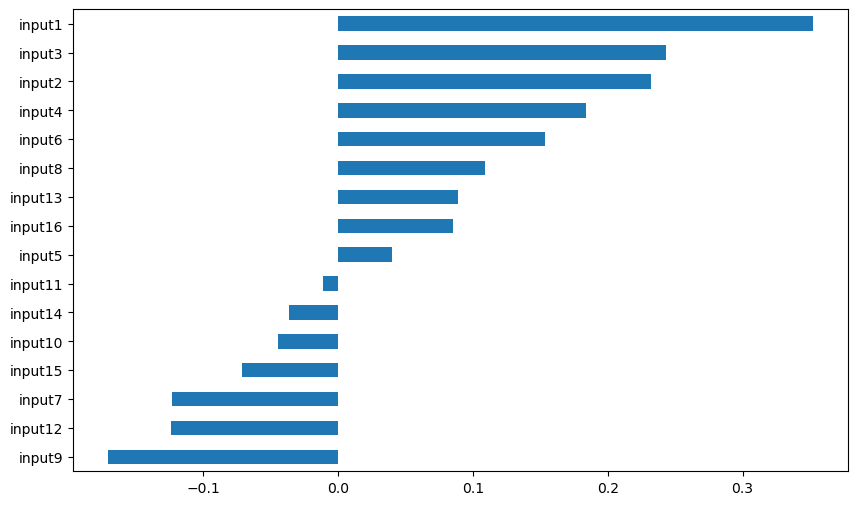

In [11]:
df.corr()["class"].drop("class").sort_values().plot.barh();

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Train | Test Split</h3>
</div>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test:  ", X_test.shape)
print("y_test:  ", y_test.shape)

X_train:  (8793, 16)
y_train:  (8793,)
X_test:   (2199, 16)
y_test:   (2199,)


<h2 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 250%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Support Vector Classifier</b>
</h2>

In [16]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [18]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=steps)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(random_state=42))])

In [19]:
scores = cross_validate(pipe_model, X_train, y_train, scoring=["accuracy", "recall_macro", "precision_macro", "f1_macro"], cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy           0.995
train_accuracy          0.996
test_recall_macro       0.995
train_recall_macro      0.996
test_precision_macro    0.995
train_precision_macro   0.996
test_f1_macro           0.995
train_f1_macro          0.996
dtype: float64

In [20]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">SVC Grid Model</h3>
</div>

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1, 1.0],
             "SVC__gamma": ["scale", "auto", 0.2, 0.3],
             "SVC__kernel": ["rbf", "linear"]}

In [23]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced",
                                                   random_state=42))]
pipe_model = Pipeline(steps)

svc_grid_model = GridSearchCV(estimator=pipe_model,
                              param_grid=param_grid,
                              scoring="f1_macro",
                              cv=2,
                              n_jobs=-1)

In [24]:
svc_grid_model.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1, 1.0],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='f1_macro')

In [25]:
svc_grid_model.best_params_

{'SVC__C': 1.0, 'SVC__gamma': 0.2, 'SVC__kernel': 'rbf'}

In [26]:
svc_grid_model.best_score_

0.9939789152154045

In [27]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[229   0   0   0   0   0   0   0   0   0]
 [  0 225   1   1   0   0   0   1   1   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   0   1 209   0   0   0   1   0   0]
 [  0   0   0   0 229   0   0   0   0   0]
 [  0   0   0   1   0 209   0   0   1   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   1   0   0   0   0   0   1   0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.98      0.99       229
           2       0.99      0.99      0.99       229
           3       0.99      0.99      0.99       211
           4       1.00      1.00      1.00       229
           5       1.00      0.99      1.00       211
           6       1.00      1.00      1.00       211
           7       0.98      1.00      0.99       228
           8       0.99      1.00      1.00       211
           9       

In [40]:
scores = cross_validate(svc_grid_model, X_train, y_train, scoring=["f1_macro"], cv=2, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 3))

df_scores.mean()[2:]

test_f1_macro    0.994
train_f1_macro   0.998
dtype: float64

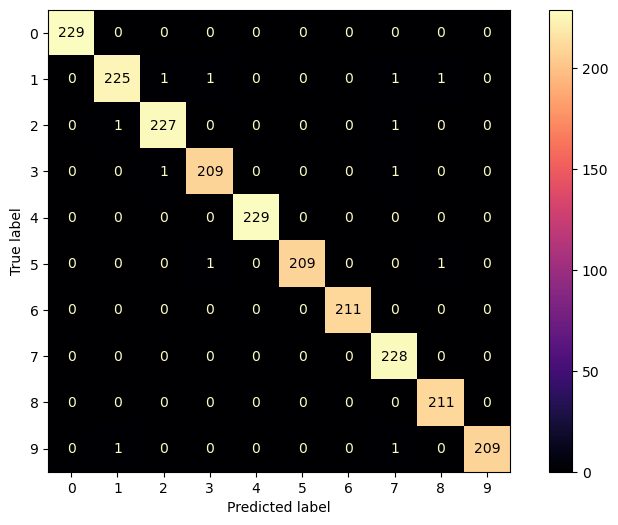

In [105]:
ConfusionMatrixDisplay.from_estimator(svc_grid_model, X_test, y_test, cmap="magma");

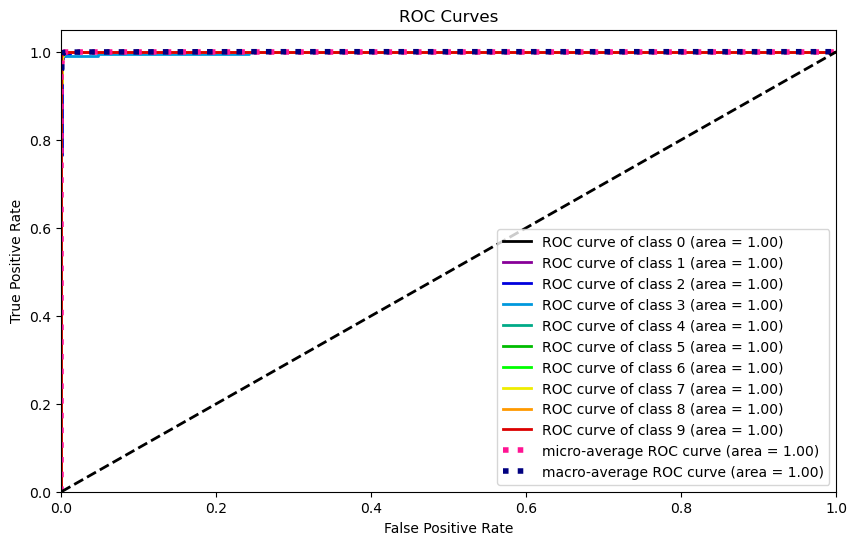

In [103]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = svc_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

<h2 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 250%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Decision Tree</b>
</h2>

In [78]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=100)
    plot_tree(model["DT_model"],
              filled=True,
              feature_names=new_features,
              fontsize=8)
    #feature_names=X.columns

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[227   0   0   0   0   0   1   0   1   0]
 [  0 209   8   3   2   2   0   1   0   4]
 [  0   9 215   1   1   1   0   2   0   0]
 [  0   4   2 199   0   2   0   2   0   2]
 [  0   0   0   0 225   1   1   0   0   2]
 [  0   1   0   2   1 199   0   1   1   6]
 [  1   0   0   0   1   0 209   0   0   0]
 [  0   2   0   0   0   0   0 223   2   1]
 [  1   2   0   1   0   4   1   3 198   1]
 [  0   2   2   2   1   3   0   0   0 201]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.91      0.91      0.91       229
           2       0.95      0.94      0.94       229
           3       0.96      0.94      0.95       211
           4       0.97      0.98      0.98       229
           5       0.94      0.94      0.94       211
           6       0.99      0.99      0.99       211
           7       0.96      0.98      0.97       228
           8       0.98      0.94      0.96       211
           9       

In [43]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score

In [85]:
from sklearn.model_selection import StratifiedKFold

model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)


cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "recall_macro", "precision_macro", "f1_macro"],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy           0.961
train_accuracy          1.000
test_recall_macro       0.961
train_recall_macro      1.000
test_precision_macro    0.962
train_precision_macro   1.000
test_f1_macro           0.961
train_f1_macro          1.000
dtype: float64

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Decision Tree Grid Model</h3>
</div>

In [64]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
              "DT_model__max_depth": [None, 6, 7, 8],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [65]:
steps= [("scaler", StandardScaler()), ("DT_model", DecisionTreeClassifier(random_state=42))]

pipe_model = Pipeline(steps=steps)

In [86]:
dt_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=2,
                          return_train_score=True,
                          n_jobs=-1)

In [87]:
dt_grid_model.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 6, 7, 8],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_macro')

In [88]:
dt_grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'random'}

In [89]:
dt_grid_model.best_score_

0.9484105521014459

In [94]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test);

Test_Set
[[225   0   0   0   0   0   1   0   3   0]
 [  2 196  15   5   3   1   0   4   1   2]
 [  0   6 219   0   1   0   0   2   1   0]
 [  0   2   2 203   0   1   0   1   0   2]
 [  0   2   0   0 221   0   2   1   0   3]
 [  0   1   0   8   0 200   0   0   1   1]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   1   0   5   1   0   1 218   2   0]
 [  1   0   0   0   0   1   1   6 201   1]
 [  0   2   0   1   2   3   0   1   1 201]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       229
           1       0.93      0.86      0.89       229
           2       0.93      0.96      0.94       229
           3       0.91      0.96      0.94       211
           4       0.97      0.97      0.97       229
           5       0.97      0.95      0.96       211
           6       0.98      1.00      0.99       211
           7       0.94      0.96      0.95       228
           8       0.96      0.95      0.95       211
           9       

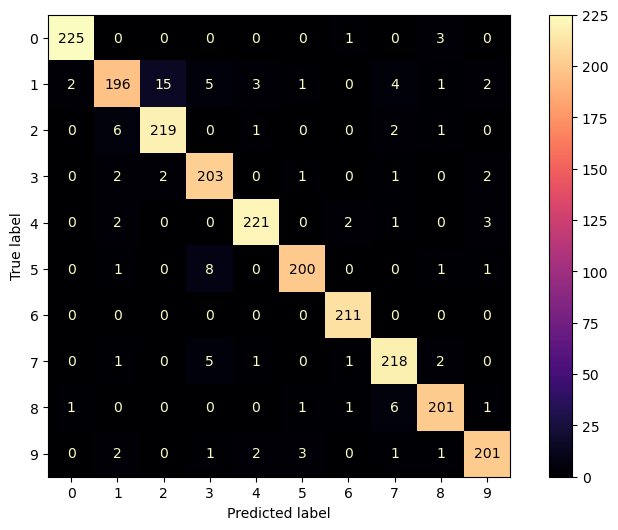

In [104]:
ConfusionMatrixDisplay.from_estimator(dt_grid_model, X_test, y_test, cmap="magma");

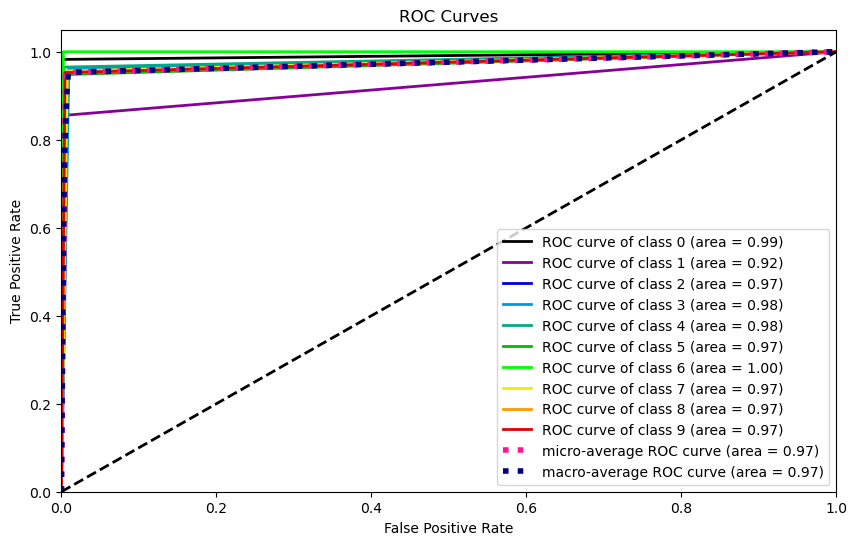

In [102]:
# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = dt_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

<h2 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 250%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Random Forest Classifier</b>
</h2>

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

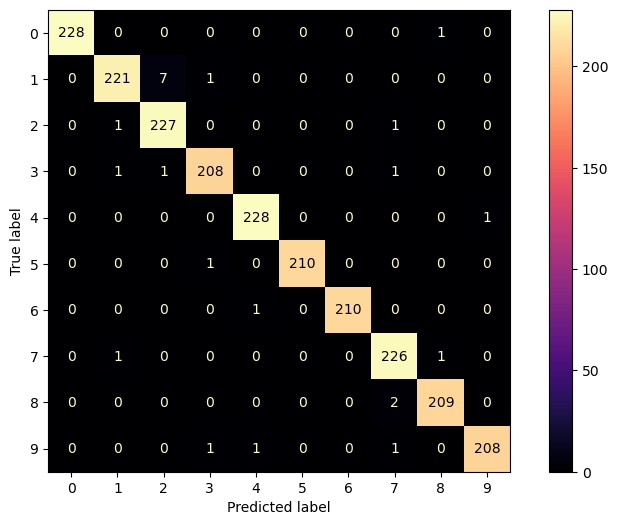

In [100]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="magma");

In [97]:
eval_metric(rf_model, X_train, y_train, X_test, y_test);

Test_Set
[[228   0   0   0   0   0   0   0   1   0]
 [  0 221   7   1   0   0   0   0   0   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   1   1 208   0   0   0   1   0   0]
 [  0   0   0   0 228   0   0   0   0   1]
 [  0   0   0   1   0 210   0   0   0   0]
 [  0   0   0   0   1   0 210   0   0   0]
 [  0   1   0   0   0   0   0 226   1   0]
 [  0   0   0   0   0   0   0   2 209   0]
 [  0   0   0   1   1   0   0   1   0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.97      0.99      0.98       229
           3       0.99      0.99      0.99       211
           4       0.99      1.00      0.99       229
           5       1.00      1.00      1.00       211
           6       1.00      1.00      1.00       211
           7       0.98      0.99      0.98       228
           8       0.99      0.99      0.99       211
           9       

In [98]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "recall_macro", "precision_macro", "f1_macro"], cv = cv,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy           0.990
train_accuracy          1.000
test_recall_macro       0.990
train_recall_macro      1.000
test_precision_macro    0.990
train_precision_macro   1.000
test_f1_macro           0.990
train_f1_macro          1.000
dtype: float64

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h3 style="font-weight: bold; color: darkblue;">Random Forest Grid Model</h3>
</div>

In [ ]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.8, 1]}

# Choose the Best Model